<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1: K-Means by the algorithm

INSTRUCTIONS:

- Replace the `___` with proper code to run the cells
- Observe and understand the results
- Answer the questions

In [4]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
import seaborn as sns

In [5]:
## Load the Iris dataset

# Load the Iris dataset from sklearn
iris = datasets.load_iris()

In [6]:
## Get some description about the data

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
## Convert data into a DataFrame

# Declare the columns names
columns = 'Sepal_Length Sepal_Width Petal_Length Petal_Width'.split()

# Load the dataset as a pandas data frame
X = pd.DataFrame(iris.data, columns = columns)

In [8]:
X.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
## Check data

# About X
print('X is a %s' % type(X))
print('X has %d rows and %d columns' % X.shape)
print('Basic Statistics about X%s' % ('_'*50))
print(X.describe())
print('')
print('Sample of X%s' % ('_'*50))
print(X.head())

X is a <class 'pandas.core.frame.DataFrame'>
X has 150 rows and 4 columns
Basic Statistics about X__________________________________________________
       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Sample of X__________________________________________________
   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6         

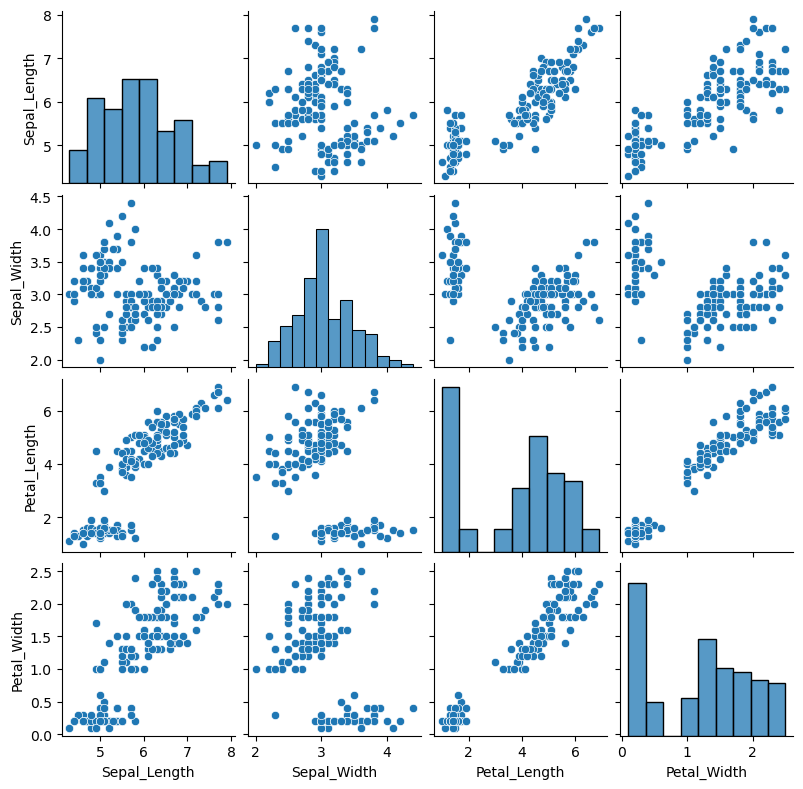

In [16]:
## Visualise the data points

# visualise features in pairs
sns.pairplot(X, height=2, aspect=1)
plt.show()

### Question: What are other important things to know about the data? Comment on:
- Types - All columns are float columns with comparable mean and SD, therefore no standardisation is necessary.
- Availability - All columns have 150 values, so there are no missing values. 
- Dispersion and Distribution - Majority of plots show 2 distinct clutters which could be an accurate sample of the population or reflect missing data from particular subsets of the population.

### Question: Which features could/should be used to cluster the data points?
- Sepal length, petal length and petal width show distinct clusters, whereas comparatively, plots with sepal width have more dispersion, so sepal width is least helpful.
- Petal length and petal width have a strong positive correlation, therefore we can use petal length which shows more distinct clutters with other features, and not necessarily have both.

In [18]:
## Create some supporting functions

# Create new centroids randomly for all the K clusters including all dimensions

def create_centroids(K, features):
    centroids = [] #initialise an empty list for the centroids
    for i in range(K): #for loop
        dimensions = [] #initalise an empty list for randomly generated values for each centroid
        for f in features:
            x = np.random.uniform(X[f].min(), X[f].max()) #generate a random number between min and max of each feature
            dimensions.append(x) #add the randomly generated number to the dimensions list
        centroids.append(dimensions) # add all dimensions for the centroids to the centroids list

    return centroids

In [19]:
features = ['Sepal_Length', 'Petal_Length']
centroids = create_centroids(2, X[features])
print(centroids)

[[5.371167084802922, 2.3124876107148156], [6.495951782867219, 5.689708136434269]]


The **Euclidean distance** between points `p` and `q` is the length of the line segment connecting them ($\overline{pq}$).

In **Cartesian coordinates**, if $p = (p_1, p_2,..., p_n)$ and $q = (q_1, q_2,..., q_n)$ are two points in **Euclidean n-space**, then the distance `d` from `p` to `q`, or from `q` to `p` is given by the **Pythagorean formula**:

$$
{\displaystyle {\begin{aligned}d(\mathbf {p} ,\mathbf {q} )=d(\mathbf {q} ,\mathbf {p} )&={\sqrt {(q_{1}-p_{1})^{2}+(q_{2}-p_{2})^{2}+\cdots +(q_{n}-p_{n})^{2}}}\\[8pt]&={\sqrt {\sum _{i=1}^{n}(q_{i}-p_{i})^{2}}}.\end{aligned}}}
$$

In [21]:
# Identify the closest centroid for a given data point

def closest_centroid(x, centroids):
    distances = [] #initialise an empty list for the distances
    p = np.array(x) #convert data point into a numpy array
    for c in centroids:
        q = np.array(c) #convert centroids into a numpy array
        d = np.sqrt(np.square(p - q).sum()) #calculate the distance between the data point and the centroid
        distances.append(d) #append the distance to the distances list

    return np.array(distances).argmin() #convert distances list into a numpy array and return the index of the centroid with the smallest distance

y = X[features].apply(lambda row: closest_centroid(row, centroids), axis=1) #apply function to all data points
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Length: 150, dtype: int64


In [22]:
# recalculate all the centroids based on the mean of the members of each cluster

def update_centroid(X, y, centroids): 
    c = [] #initialise an empty list to store new centroids
    for i in range(len(centroids)): #loop over each existing centroid
        if X[y == i].shape[0]: #if cluster i has members
            dimensions = [] 
            for f in X.columns:
                x = X[f][y == i].mean() #calculate the mean to determine the new centroid position
                dimensions.append(x)
            c.append(dimensions)
       
        else: #if cluster i has no members
            c.append(centroids[i]) #keep the original centroid

    return c

In [28]:
c = update_centroid(X[features], y, centroids)
print(c)

[[5.101538461538462, 1.9784615384615387], [6.410588235294117, 5.118823529411765]]


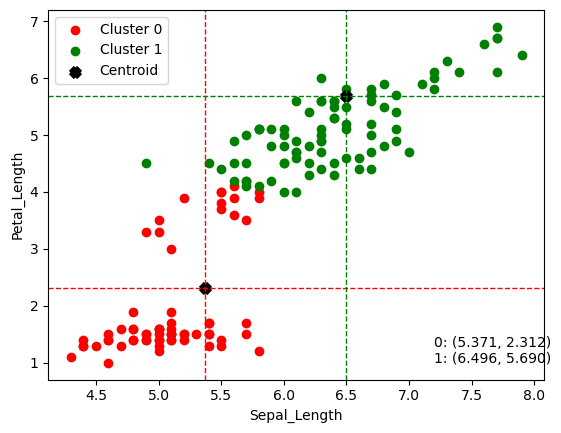

In [30]:
# plot a chart of the data points and centroids either generic or identifying the clusters

def plot_data(ax, X, y, centroids, show_clusters = True):
    # unpack the coordinates of the centroids
    a = [z[0] for z in centroids]
    b = [z[1] for z in centroids]

    # show distinct colours if asked to identify the clusters
    if show_clusters:
        colours = 'rgbykcm'
        for i in range(len(centroids)):
            ax.scatter(X[features[0]][y == i], X[features[1]][y == i], c = colours[i], label = 'Cluster %d' % i)
    # show data points without cluster identification
    else:
        ax.scatter(X[features[0]], X[features[1]], label = 'Data Point')

    # label the features
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])

    # identify the centroids
    ax.scatter(a, b, c = 'k', linewidths = 5, marker = 'x', label = 'Centroid')
    for i in range(len(a)):
        c = colours[i] if show_clusters else 'k'
        ax.axvline(x = a[i], color = c, linestyle = '--', linewidth = 1)
        ax.axhline(y = b[i], color = c, linestyle = '--', linewidth = 1)

    # show centroids' coordinates
    t = '\n'.join(['%d: (%.3f, %.3f)' % (i, a, b) for (i, (a, b)) in enumerate(centroids)])
    ax.text(7.2, 1, t)

    ax.legend()

fig, ax = plt.subplots()
plot_data(ax, X[features], y, centroids)
plt.show()

[[[4.6290115358826025, 4.072391026112653], [5.591264192995434, 4.364632562636508], [5.45748611854393, 6.576702896200426], [5.859173986734033, 1.3198231396670184]]]


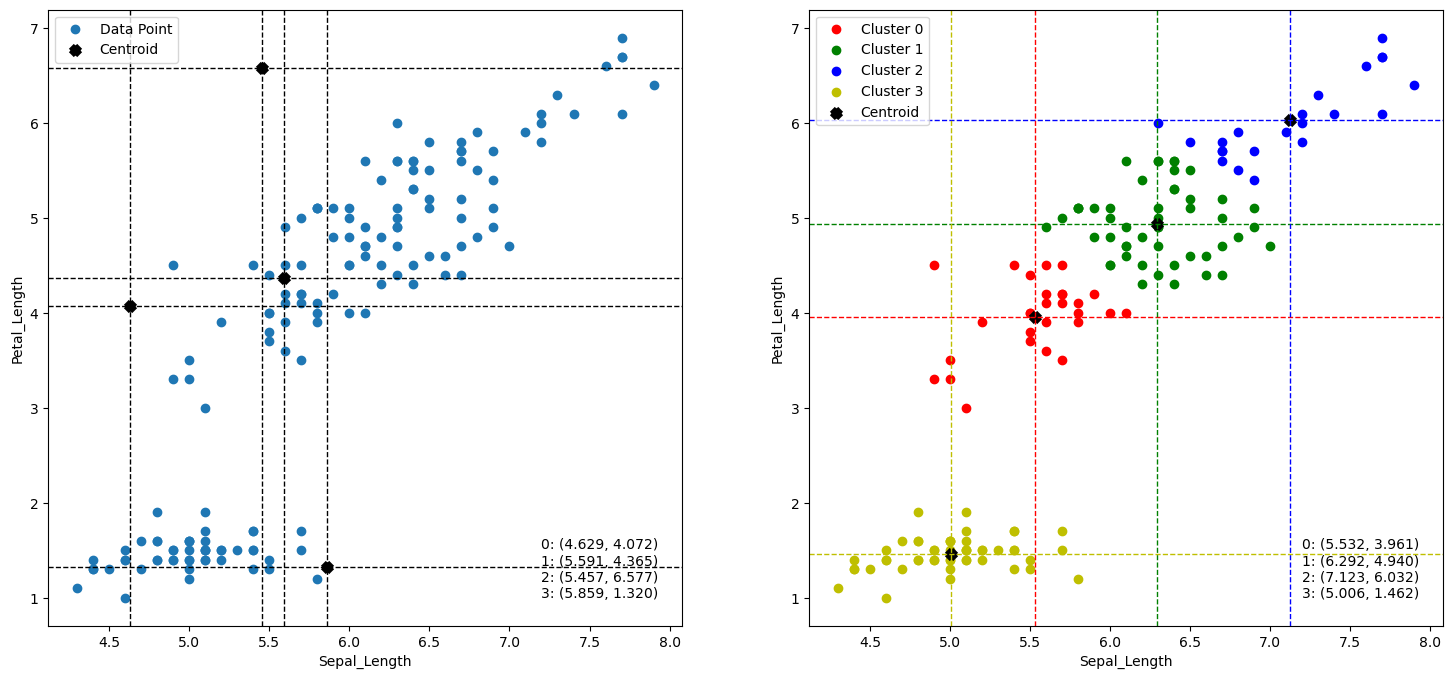

In [41]:
## K_Means
## Note that the comments match the outlined K-Means Algorithm in the presentation

# 1. Define the number of clusters `K`
K = 4

# list the features to be used
features = ['Sepal_Length', 'Petal_Length']

# 2. Select `K` cluster centres randomly
centroids = create_centroids(K, features)
centroids_list = [centroids]
print(centroids_list)

# plot the data points and initial centroids (the 'Before')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 8))
plot_data(axes[0], X[features], None, centroids, False)

# repeat until makes no moves
while True:
    # 3. Calculate the distance between each data point and cluster centres
    # 4. Assign the data point to the cluster whose distance from its centre is minimum

    y = X[features].apply(lambda x: closest_centroid(x, centroids), axis = 1).values

    # move the known assignment be the previous state, for post comparison
    old_c = centroids.copy()

    # 5. Recalculate all new cluster centres by averaging the objects of each cluster
    centroids = update_centroid(X[features], y, centroids)
    centroids_list.append(centroids)

    # 6. Repeat steps 3 to 5 until the centroids do not change
    if old_c == centroids:
        break

# plot the data points identified by cluster and final centroids (the 'After')
plot_data(axes[1], X[features], y, centroids)
plt.show()

>

>



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



